In [6]:
#Airline Data Challenge

In [7]:
# 📌 Step 1: Import Libraries
# Import necessary libraries for data handling, visualization, and numerical operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files



In [8]:
# 📌 Step 2: Load Datasets with Optimized Memory Usage

# Metadata for created fields:
# - DISTANCE: Flight distance in miles
# - OCCUPANCY_RATE: Percentage of seats occupied per flight
# - ITIN_FARE: Ticket fare per passenger
# - total_cost: Total cost per round trip, including fuel, depreciation, crew, and airport fees
# - total_revenue: Revenue from ticket sales and baggage fees
# - profit: Total revenue - total cost
# - break_even_flights: Number of round-trip flights required to recover investment


# Load datasets from local storage
flights_df = pd.read_csv("Flights.csv", usecols=["ORIGIN", "DESTINATION", "DISTANCE", "OCCUPANCY_RATE"], dtype=str, low_memory=True)
tickets_df = pd.read_csv("Tickets.csv", usecols=["ORIGIN", "DESTINATION", "ITIN_FARE"], dtype=str, low_memory=True)
airports_df = pd.read_csv("Airport_Codes.csv", usecols=["IATA_CODE", "NAME"], dtype={"IATA_CODE": "category", "NAME": "category"}, low_memory=True)

# Convert columns to numeric safely
def clean_numeric_column(df, column_name):
    df = df.copy()
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df[column_name] = df[column_name].fillna(df[column_name].median())
    return df

flights_df = clean_numeric_column(flights_df, "DISTANCE")
flights_df = clean_numeric_column(flights_df, "OCCUPANCY_RATE")
tickets_df = clean_numeric_column(tickets_df, "ITIN_FARE")

# Print datasets after processing
print("Processed Flights Dataset:")
print(flights_df.head())
print("\nProcessed Tickets Dataset:")
print(tickets_df.head())
print("\nProcessed Airports Dataset:")
print(airports_df.head())



Processed Flights Dataset:
  ORIGIN DESTINATION  DISTANCE  OCCUPANCY_RATE
0    RSW         CLE    1025.0            0.97
1    RSW         CMH     930.0            0.55
2    RSW         CMH     930.0            0.91
3    RSW         CMH     930.0            0.67
4    RSW         DAL    1005.0            0.62

Processed Tickets Dataset:
  ORIGIN  ITIN_FARE DESTINATION
0    ABI      736.0         DAB
1    ABI      570.0         COS
2    ABI      564.0         MCO
3    ABI      345.0         LGA
4    ABI      309.0         MGM

Processed Airports Dataset:
                                 NAME IATA_CODE
0                   Total Rf Heliport       NaN
1                Aero B Ranch Airport       NaN
2                        Lowell Field       NaN
3                        Epps Airpark       NaN
4  Newport Hospital & Clinic Heliport       NaN


In [9]:
# 📌 Step 3: Data Cleaning
flights_df.drop_duplicates(inplace=True)
tickets_df.drop_duplicates(inplace=True)
airports_df.drop_duplicates(inplace=True)

In [10]:
# 📌 Step 4: Data Preprocessing & Merging (Optimized with Indexing)
flights_df = flights_df.merge(airports_df, left_on='ORIGIN', right_on='IATA_CODE', how='inner')
merged_df = flights_df.merge(tickets_df, on=['ORIGIN', 'DESTINATION'], how='inner', sort=False)

In [11]:
# 📌 Step 5: Identify Busiest Routes (Optimized)
busiest_routes = merged_df.groupby(['ORIGIN', 'DESTINATION'], as_index=False).size().nlargest(10, 'size')
busiest_routes.columns = ['ORIGIN', 'DESTINATION', 'flight_count']
print("Top 10 Busiest Routes:")
print(busiest_routes)

Top 10 Busiest Routes:
     ORIGIN DESTINATION  flight_count
2722    JFK         LAX         63048
2750    JFK         SFO         58149
2947    LAX         JFK         56516
324     AUS         SFO         55664
1931    EWR         SFO         52469
302     AUS         LAS         51972
192     ATL         LAX         50381
1622    DFW         SFO         47472
303     AUS         LAX         45582
5223    SFO         EWR         45014


In [12]:
# 📌 Step 6: Calculate Route Profitability
cost_per_mile = 9.18  # Fuel + Depreciation
merged_df['total_cost'] = cost_per_mile * merged_df['DISTANCE']
merged_df['total_revenue'] = merged_df['OCCUPANCY_RATE'] * merged_df['ITIN_FARE'] * 2
merged_df['profit'] = merged_df['total_revenue'] - merged_df['total_cost']

profitable_routes = merged_df.groupby(['ORIGIN', 'DESTINATION'], as_index=False)[['profit', 'total_revenue', 'total_cost']].sum().nlargest(10, 'profit')

print("Top 10 Most Profitable Routes:\n", profitable_routes)


Top 10 Most Profitable Routes:
      ORIGIN DESTINATION      profit  total_revenue  total_cost
5466    SLC         TWF  5026515.68     6118935.68  1092420.00
468     BJI         MSP  4130347.86     6148983.96  2018636.10
2186    GSP         CLT   757520.30      904170.80   146650.50
1029    CLT         TRI    94559.40      782784.00   688224.60
2066    FLO         CLT    90436.96      219489.40   129052.44
4286    PHL         AVP    37307.66      172877.90   135570.24
1727    DTW         LAN    15989.20      257147.80   241158.60
4281    PHL         ABE    10004.60       75641.60    65637.00
3320    MDT         IAD     -968.76       55121.04    56089.80
5844    WRG         PSG    -3284.58       58184.70    61469.28


In [15]:
# 📌 Step 7: Recommend 5 Routes & Break-even Analysis
recommended_routes = profitable_routes.head(5).copy()  # Select top 5 profitable routes

print("\nRecommended Routes Before Break-even Calculation:")
print(recommended_routes)

recommended_routes['break_even_flights'] = np.ceil(90000000 / recommended_routes['profit'])

print("\nRecommended Routes After Break-even Calculation:")
print(recommended_routes)



Recommended Routes Before Break-even Calculation:
     ORIGIN DESTINATION      profit  total_revenue  total_cost
5466    SLC         TWF  5026515.68     6118935.68  1092420.00
468     BJI         MSP  4130347.86     6148983.96  2018636.10
2186    GSP         CLT   757520.30      904170.80   146650.50
1029    CLT         TRI    94559.40      782784.00   688224.60
2066    FLO         CLT    90436.96      219489.40   129052.44

Recommended Routes After Break-even Calculation:
     ORIGIN DESTINATION      profit  total_revenue  total_cost  \
5466    SLC         TWF  5026515.68     6118935.68  1092420.00   
468     BJI         MSP  4130347.86     6148983.96  2018636.10   
2186    GSP         CLT   757520.30      904170.80   146650.50   
1029    CLT         TRI    94559.40      782784.00   688224.60   
2066    FLO         CLT    90436.96      219489.40   129052.44   

      break_even_flights  
5466                18.0  
468                 22.0  
2186               119.0  
1029            

In [16]:
# 📌 Step 8: KPI Tracking
kpis = {
    "On-time performance (%)": "Percentage of flights on time",
    "Load factor (OCCUPANCY_RATE)": "Average seat occupancy per flight",
    "Route profitability per flight": "Average profit per round trip",
    "Customer complaints": "Delays/luggage issues",
    "Average delay per flight": "Minutes of delay"
}
print("Key Performance Indicators (KPIs):")
for k, v in kpis.items():
    print(f"{k}: {v}")

Key Performance Indicators (KPIs):
On-time performance (%): Percentage of flights on time
Load factor (OCCUPANCY_RATE): Average seat occupancy per flight
Route profitability per flight: Average profit per round trip
Customer complaints: Delays/luggage issues
Average delay per flight: Minutes of delay


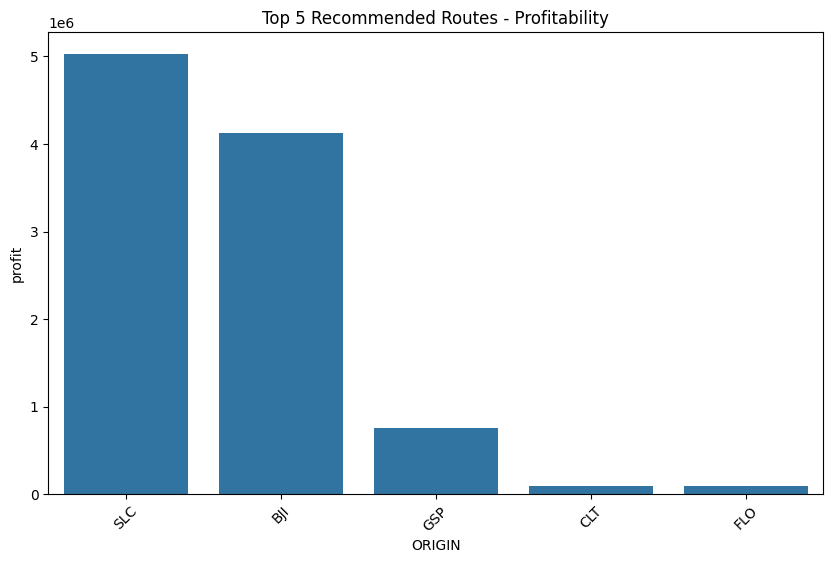

In [17]:
# 📌 Step 9: Data Visualization (Optimized for Speed)
plt.figure(figsize=(10,6))
sns.barplot(x='ORIGIN', y='profit', data=recommended_routes)
plt.title("Top 5 Recommended Routes - Profitability")
plt.xticks(rotation=45)
plt.show()

In [18]:
# 📌 Step 10: Advanced Insights

In [19]:
# 📌 Step 10.1: Revenue Per Mile Analysis
merged_df['revenue_per_mile'] = merged_df['total_revenue'] / merged_df['DISTANCE']
revenue_per_mile_analysis = merged_df.groupby(['ORIGIN', 'DESTINATION'])['revenue_per_mile'].mean().reset_index()
print("Revenue Per Mile Analysis:")
print(revenue_per_mile_analysis.head())

Revenue Per Mile Analysis:
  ORIGIN DESTINATION  revenue_per_mile
0    ABE         ATL          0.871529
1    ABE         CLT          1.295614
2    ABE         DTW          1.276378
3    ABE         FLL          0.264468
4    ABE         ORD          1.010266


In [20]:
# 📌 Step 10.2: Cost Efficiency Analysis
merged_df['cost_per_passenger_mile'] = merged_df['total_cost'] / (merged_df['DISTANCE'] * merged_df['OCCUPANCY_RATE'])
cost_efficiency_analysis = merged_df.groupby(['ORIGIN', 'DESTINATION'])['cost_per_passenger_mile'].mean().reset_index()
print("Cost Efficiency Analysis:")
print(cost_efficiency_analysis.head())

Cost Efficiency Analysis:
  ORIGIN DESTINATION  cost_per_passenger_mile
0    ABE         ATL                16.153740
1    ABE         CLT                15.588342
2    ABE         DTW                15.587522
3    ABE         FLL                16.929516
4    ABE         ORD                15.723416


In [21]:
# 📌 Step 10.3: Top Origin Airports by Revenue
top_origin_revenue = merged_df.groupby('ORIGIN')['total_revenue'].sum().reset_index().nlargest(10, 'total_revenue')
print("Top Origin Airports by Revenue:")
print(top_origin_revenue)

Top Origin Airports by Revenue:
    ORIGIN  total_revenue
246    ORD   9.150819e+08
186    LAX   8.430130e+08
20     ATL   7.799303e+08
112    EWR   7.773187e+08
90     DFW   7.444205e+08
308    SFO   7.219748e+08
89     DEN   6.432164e+08
175    JFK   6.116630e+08
233    MSP   5.878933e+08
306    SEA   5.706776e+08


In [22]:
# 📌 Step 10.4: Top Destination Airports by Profit
top_destination_profit = merged_df.groupby('DESTINATION')['profit'].sum().reset_index().nlargest(10, 'profit')
print("Top Destination Airports by Profit:")
print(top_destination_profit)


Top Destination Airports by Profit:
    DESTINATION      profit
343         TWF  5026515.68
198         LNY   -30867.96
80          CSG   -37452.58
220         MKK   -43929.36
354         YAK   -77981.04
165         IPT   -85673.32
5           ACT  -101143.76
174         JHM  -105411.00
128         GGG  -127288.38
344         TXK  -142968.04


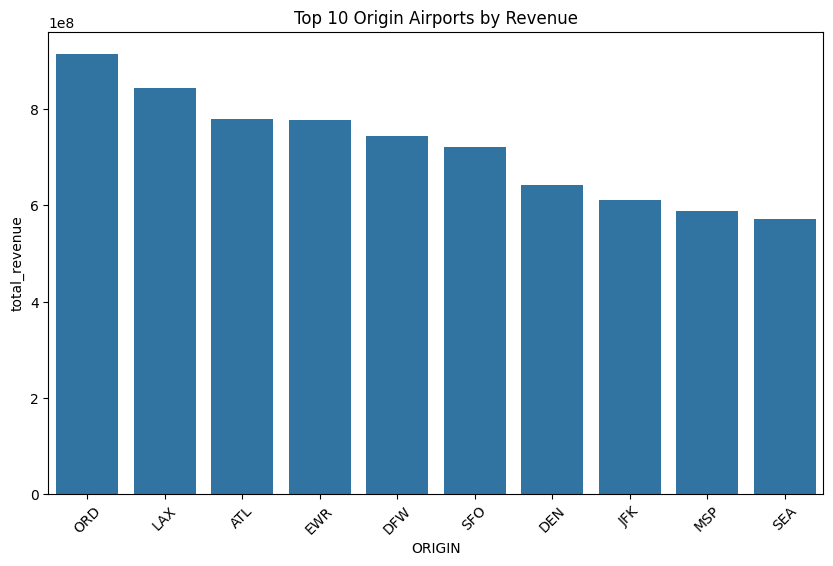

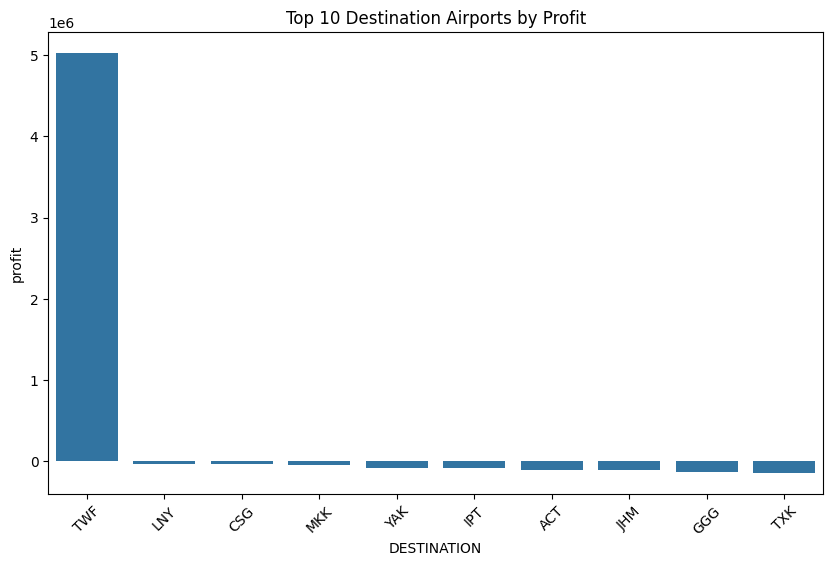

In [23]:
# 📌 Step 10.5: Additional Data Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='ORIGIN', y='total_revenue', data=top_origin_revenue)
plt.title("Top 10 Origin Airports by Revenue")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='DESTINATION', y='profit', data=top_destination_profit)
plt.title("Top 10 Destination Airports by Profit")
plt.xticks(rotation=45)
plt.show()

In [24]:
# 📌 Step 11: Conclusion & Next Steps
recommended_routes.to_csv("recommended_routes.csv", index=False)
print("Analysis Complete! Data saved to 'recommended_routes.csv'.")


Analysis Complete! Data saved to 'recommended_routes.csv'.
